#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### Loading Data Set

In [2]:
df=pd.read_csv("MoviesOnOTT.csv")

In [3]:
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1.0,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1.0,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1.0,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1.0,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1.0,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


#### Data Cleaning:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  float64
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16145 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(3), int64(6), object(7)
memory usage: 1.6+ MB


In [5]:
print("Percentage of null values in respective Columns")
(df.isnull().sum()/df.shape[0])*100

Percentage of null values in respective Columns


ID                  0.000000
Title               0.000000
Year                0.000000
Age                56.079790
IMDb                3.410177
Rotten Tomatoes    69.194935
Netflix             0.000000
Hulu                0.000000
Prime Video         0.000000
Disney+             0.000000
Type                0.000000
Directors           4.335882
Genres              1.642379
Country             2.597946
Language            3.577401
Runtime             3.535595
dtype: float64

In [6]:
df.describe()

,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8372.500000,2003.014035,5.902751,0.212614,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,20.674321,1.347867,0.409170,0.225886,0.439835,0.180419,0.0,28.219222
min,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16744.000000,2020.000000,9.300000,1.010000,1.000000,1.000000,1.000000,0.0,1256.000000


#### Removing unwanted columns:

Age: There are about 57 % null values 

Rotten Tomatoes: There are about 69% null values

Type: Standard deviation is zero, thus add no value to the data frame.

In [7]:
df.drop(['Age','Rotten Tomatoes','Type'],axis=1,inplace=True)
df.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,8.8,1.0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,8.7,1.0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,8.5,1.0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,8.5,1.0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,8.8,1.0,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


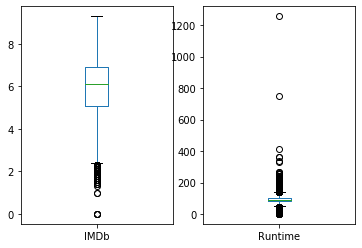

In [8]:
fig,axes=plt.subplots(1,2)
numerical=['IMDb','Runtime']
for t,i in enumerate(numerical):
    df[i].plot(kind="box",ax=axes[t])
plt.show()

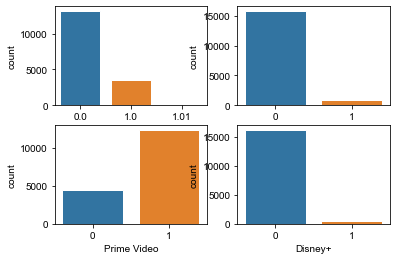

In [9]:
fig,axes=plt.subplots(2,2)
sns.set_style("darkgrid")
platform=['Netflix','Hulu','Prime Video','Disney+']
for t,i in enumerate(platform):
    if t<2:
        sns.countplot(x=i,data=df,ax=axes[0][t])
    else:
        sns.countplot(x=i,data=df,ax=axes[1][t%2])
plt.show()

#### From the above bar plot of value counts, there is a undiserable value found in Netflix platform
Converting them to 1 and astype of integer

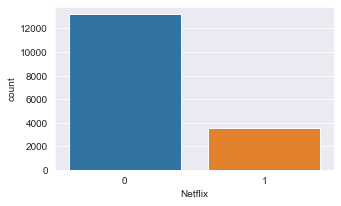

In [10]:
plt.figure(figsize=(5,3))
df.Netflix[df.Netflix==1.01]=1
df.Netflix=df.Netflix.astype('int')
sns.countplot(x='Netflix',data=df)
plt.show()

#### Null handling:

In [11]:
df.isnull().sum().sum()

3198

Imputation:

    IMDb:Median
    
    Directors:"Unknown"
    
    Genres:"Missing"
    
    Country:"Unknown"
    
    Language:"English"
    
    Runtime:120

In [12]:
df.fillna({'IMDb':df['IMDb'].median(),'Directors':'Unknown','Genres':'Missing','Country':'Un_known','Language':'English','Runtime':120},inplace=True)
df.isnull().sum().sum()

0

### Statistical Analysis:

In [13]:
from scipy.stats import f_oneway,chi2_contingency

#### * Checking whether IMDb rating is get influenced by Genres using chi2_contingency.

Pre_requiste:
    
    * IMDB is converted to bucket levels
    
    * Language processing on Genres using CountVectorizer
    
    

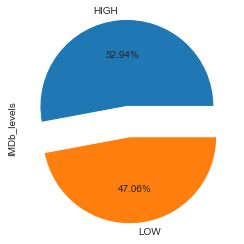

In [14]:
# IMDB is converted to bucket levels
df["IMDb_levels"]=df.IMDb.apply(lambda x: 'HIGH' if x>6 else 'LOW' )
df["IMDb_levels"].value_counts().plot(kind='pie',autopct='%.2f%%',explode=[.25,.1])
plt.show()

In [15]:
# Language processing on Genres using CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [16]:
genres=list(df.Genres.values)

In [17]:
vectorizer = CountVectorizer()
gen = vectorizer.fit_transform(genres)
genres_count=pd.DataFrame(gen.toarray(),columns=vectorizer.get_feature_names())
genres_count.head()

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,...,romance,sci,short,show,sport,talk,thriller,tv,war,western
0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
genres_count["Levels"]=df.IMDb_levels.values
data_g = genres_count.groupby("Levels").sum()

Figuring Hypothesis:
    
    ho: There is no significant effect on IMDb high or Low by the genres
    
    ha: There is a significant effect.

In [19]:
stat, p, dof, expected = chi2_contingency(data_g)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('There is a significant effect (reject H0)')
else:
    print('There is no significant effect on IMDb high or Low by the genres (H0 holds true)')

p value is 0.0
There is a significant effect (reject H0)



#### Post Hoc analysis:

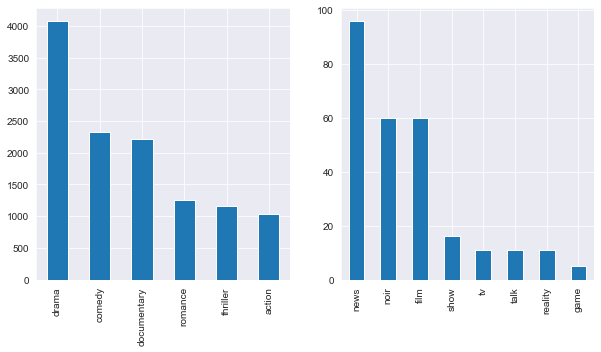

In [20]:
# Count Genres based movies in High _level_IMDb  for top Genres and bottom genres

fig,axes=plt.subplots(1,2,figsize=(10,5))

data_g.T["HIGH"][data_g.T["HIGH"]>1000].sort_values(ascending=False).plot(kind='bar',ax=axes[0])

data_g.T["HIGH"][data_g.T["HIGH"]<100].sort_values(ascending=False).plot(kind='bar',ax=axes[1])

plt.show()

#### * Checking whether IMDb rating is get influenced by Directors using one_way Anova.


Figuring Hypothesis:

ho: Mean IMDb of the movies directed by all directors are same.

ha: Mean IMDb of the movies directed by all directors are different.

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('IMDb ~ Directors', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table


# # In Case of MemoryError

# import statsmodels.api as sm
# from statsmodels.formula.api import ols

# model = ols('IMDb ~ Directors', data=df.head(1000)).fit()
# aov_table = sm.stats.anova_lm(model, typ=2)
# aov_table

,sum_sq,df,F,PR(>F)
Directors,491.555901,835.0,1.696338,0.000022
Residual,56.913849,164.0,NaN,NaN


P value is less than 0.05, we reject null Hypothesis
ie) Mean IMDb of the movies directed by all directors are different.

#### Post Hoc analysis:

In [22]:
print("Top 10 Directors and number of movies count")
df.groupby("Directors").agg({'IMDb':'mean','Title':'count'}).sort_values(['Title','IMDb'],ascending=False).iloc[1:10,:]

Top 10 Directors and number of movies count


,IMDb,Title
Directors,,
Jay Chapman,6.472222,36
Joseph Kane,6.240000,30
Cheh Chang,6.757692,26
Sam Newfield,5.468182,22
Jim Wynorski,3.681818,22
William Beaudine,5.200000,21
David DeCoteau,3.195238,21
Jay Karas,6.565000,20
"Raúl Campos,Jan Suter",6.215000,20


In [23]:
print("Last 10 Directors and number of movies count")
df.groupby("Directors").agg({'IMDb':'mean','Title':'count'}).sort_values(['Title','IMDb'],ascending=False).iloc[-10:,:]

Last 10 Directors and number of movies count


,IMDb,Title
Directors,,
"Orlando Corradi,Kim J. Ok",1.6,1
Robert D. Hanna,1.6,1
Sasha Burrow,1.6,1
Chris Rogers,1.5,1
"Deland Nuse,Ulli Lommel",1.4,1
Jackson Hunsicker,1.4,1
S.A. Zaidi,1.4,1
Donald Farmer,1.3,1
David Hammelburg,0.0,1


#### Data Preparation for Recomendation System:

In [26]:
df.head()

In [27]:
# #In case of Memory error
# df=df.head(1000)

#### Creating Platform Column by concatenating them

In [28]:
df["Netflix"]=df.Netflix.apply(lambda x:'Netflix' if x==1.0 else '' )
df["Hulu"]=df["Hulu"].apply(lambda x:'Hulu' if x==1 else '' )
df["Prime Video"]=df["Prime Video"].apply(lambda x:'Prime' if x==1 else '' )
df["Disney+"]=df["Disney+"].apply(lambda x:'Disney+' if x==1 else '') 

In [29]:
df["Platform"]=df["Netflix"]+","+df["Hulu"]+","+df["Prime Video"]+","+df["Disney+"]

In [30]:
df["Platform"]=df["Platform"].apply(lambda x:x.replace(',,',','))\
                             .apply(lambda x:x.replace(',,',','))\
                             .apply(lambda x:x[1:] if x[0]==',' else x)\
                             .apply(lambda x:x[:-1] if x[-1]==',' else x)

#### Data Frame Creation for Recommendation system:

In [31]:
df_rs=pd.DataFrame()
df_rs["Title"]=df.Title.values

In [32]:
def formatt(x):
    return ' '+x.lower().replace(' ','')

In [33]:
df_rs["Cat_features"]=df.Platform.apply(formatt)+\
                      df.Directors.apply(formatt)+\
                      df.Genres.apply(formatt)+\
                      df.Country.apply(formatt)+\
                      df.Language.apply(formatt)

In [34]:
df_rs.head()

,Title,Cat_features
0,Inception,"netflix christophernolan action,adventure,sci..."
1,The Matrix,"netflix lanawachowski,lillywachowski action,s..."
2,Avengers: Infinity War,"netflix anthonyrusso,joerusso action,adventur..."
3,Back to the Future,"netflix robertzemeckis adventure,comedy,sci-f..."
4,"The Good, the Bad and the Ugly","netflix,prime sergioleone western italy,spain..."


#### Language processing on Cat_features using CountVectorizer

In [35]:
Cat_feature=list(df_rs.Cat_features.values)
vectorizer = CountVectorizer()
cat_fe = vectorizer.fit_transform(Cat_feature)
cat_fe_count=pd.DataFrame(cat_fe.toarray(),columns=vectorizer.get_feature_names())

#### Min Max scaling the IMDb rating

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Joining IMDb Values with Count Vectorized matrix
cat_fe_count["IMDb"]=scaler.fit_transform(df.IMDb.values.reshape(-1,1))

#### Obtained DataFrame :

In [37]:
cat_fe_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 1185 entries, aamirkhan to IMDb
dtypes: float64(1), int64(1184)
memory usage: 9.0 MB


#### Recommendation System

Features Considered for Recomendations:

    * Numerical[Min_max Scaled]
        * IMDb Rating
        
    * Categorical[Language Processed]
        * Directors
        * Genres
        * Language
        * Country
 Note: Each data point(row) is descriminative representation of seperate movie 

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

# geting cosine similarity score between every other movies based on count vectorized information
cosine_sim2 = cosine_similarity(cat_fe_count.values,cat_fe_count.values)

In [39]:
df = df.reset_index()
indices = pd.Series(df.index, index=df['Title'])

In [40]:
def get_recommendations(title, cosine_sim=cosine_sim2):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim2[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df[['Title','Platform','IMDb']].iloc[movie_indices]

In [41]:
df.head()

,index,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,IMDb_levels,Platform
0,0,1,Inception,2010,8.8,Netflix,,,,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,HIGH,Netflix
1,1,2,The Matrix,1999,8.7,Netflix,,,,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,HIGH,Netflix
2,2,3,Avengers: Infinity War,2018,8.5,Netflix,,,,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,HIGH,Netflix
3,3,4,Back to the Future,1985,8.5,Netflix,,,,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,HIGH,Netflix
4,4,5,"The Good, the Bad and the Ugly",1966,8.8,Netflix,,Prime,,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,HIGH,"Netflix,Prime"


In [42]:
# trying any movie for recommendation:

In [43]:
get_recommendations('Ant-Man and the Wasp')

,Title,Platform,IMDb
53,Back to the Future Part II,Netflix,7.8
136,Solo: A Star Wars Story,Netflix,6.9
3,Back to the Future,Netflix,8.5
33,Incredibles 2,Netflix,7.6
769,Tremors 2: Aftershocks,Netflix,6.0
62,Back to the Future Part III,Netflix,7.4
2,Avengers: Infinity War,Netflix,8.5
478,Time Trap,Netflix,6.5
806,The Time Machine,Netflix,6.0
93,Okja,Netflix,7.3
